### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [78]:
import pandas as pd
df = pd.read_csv('vehicle.csv')
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [79]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [80]:
df.dropna(inplace=True)

In [81]:
df.head(2)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van


In [82]:
df.shape

(813, 19)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [83]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

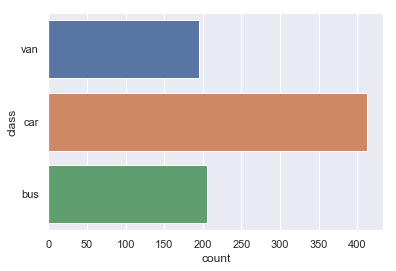

In [84]:
sns.set(rc={'figure.figsize':(6,4)})
sns.countplot(y='class', data=df)

### Check for any missing values in the data 

In [85]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

In [86]:
import numpy as np

In [87]:
data = df.drop("class",axis = 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)
#data
data = pd.DataFrame(data)
data.describe()

C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Subrat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02
mean,-2.425284e-16,-4.642999e-16,-2.351542e-16,3.665238e-16,-2.047016e-16,-1.349201e-16,3.714399e-16,-2.062038e-16,-2.651972e-16,-7.398756e-16,-3.031605e-17,-3.550529e-17,3.348422e-16,1.312159e-16,-1.693329e-17,9.845889e-17,-1.169490e-15,3.482249e-16
std,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00
min,-2.510344e+00,-1.921444e+00,-2.665447e+00,-1.937757e+00,-1.854258e+00,-1.411767e+00,-1.710835e+00,-1.922008e+00,-1.383740e+00,-2.062109e+00,-1.874279e+00,-1.452266e+00,-2.019423e+00,-1.793474e+00,-1.291420e+00,-1.422141e+00,-2.110457e+00,-1.992013e+00
25%,-8.089782e-01,-7.819133e-01,-7.635057e-01,-8.363933e-01,-5.992534e-01,-3.420870e-01,-6.824590e-01,-1.024408e+00,-6.060138e-01,-7.513773e-01,-6.863524e-01,-6.872619e-01,-7.815035e-01,-7.227236e-01,-8.847879e-01,-7.496057e-01,-8.096219e-01,-6.396066e-01
50%,-7.982157e-02,-1.307527e-01,-1.929234e-01,-6.246222e-02,-9.725132e-02,-1.281510e-01,-3.497491e-01,2.578765e-01,-2.171510e-01,-1.305046e-01,-3.010789e-01,-4.246486e-01,-3.875161e-02,-1.873484e-01,-7.152328e-02,-1.891593e-01,3.400092e-03,1.718371e-01
75%,7.708611e-01,6.831980e-01,1.011639e+00,7.710020e-01,4.047507e-01,2.997208e-01,8.903515e-01,6.425619e-01,9.494376e-01,7.663115e-01,9.189540e-01,8.427456e-01,7.349483e-01,3.480268e-01,5.384252e-01,7.075550e-01,6.538177e-01,7.127995e-01
max,3.079857e+00,2.311100e+00,1.899212e+00,4.878790e+00,9.566288e+00,9.926837e+00,2.916857e+00,2.565989e+00,3.282615e+00,2.766901e+00,4.225885e+00,3.309026e+00,2.901308e+00,8.378655e+00,3.181535e+00,3.173519e+00,2.767675e+00,2.065206e+00


In [88]:
features = list(df.columns.values) 
print(features)
feature = features.remove('class')
features

['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', 'hollows_ratio', 'class']


['compactness',
 'circularity',
 'distance_circularity',
 'radius_ratio',
 'pr.axis_aspect_ratio',
 'max.length_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration',
 'scaled_radius_of_gyration.1',
 'skewness_about',
 'skewness_about.1',
 'skewness_about.2',
 'hollows_ratio']

In [89]:
data.columns = features
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [90]:
distortion = []

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [70]:
#Initial a list to track SSE for KMeans with different K
from sklearn.cluster import KMeans
sse_df = pd.DataFrame(columns=['K','SSE'])

for i in range(2,10):
    
    #Initialize KMeans
    km = KMeans(n_clusters=i, n_init=10, max_iter=300)
    
    #Fit on the data
    km.fit(data)
    
    #Add cluster information for each record in dataframe
    data['k_' + str(i)] = km.predict(data)
    
    #Track K and SSE information in sse_df
    sse_df.loc[sse_df.shape[0]] = [i, km.inertia_]
    distortion.append(km.inertia_)

### 6. Plotting Elbow/ Scree Plot

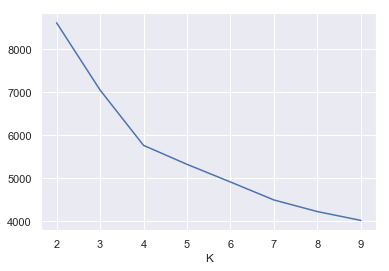

In [71]:
sns.lineplot(x='K', y=distortion, data=sse_df)

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

### Answer : So the optimum value I can see is K=4 where the elbow starts.

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [91]:
from sklearn.cluster import KMeans

In [92]:
km = KMeans(n_clusters=4)

In [93]:
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [94]:
data['k_4'] = km.predict(data)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [95]:
km.cluster_centers_

array([[-2.28397024e-01, -5.77112825e-01, -3.08062421e-01,
        -4.12415311e-02,  1.78444965e-01, -1.73698681e-01,
        -4.56879712e-01,  3.21990722e-01, -4.85591783e-01,
        -5.39969043e-01, -4.21528655e-01, -4.61480779e-01,
        -6.05499266e-01, -6.42849115e-01, -6.23412553e-02,
         1.29630066e-02,  8.22191910e-01,  7.05383081e-01],
       [ 1.15442786e+00,  1.18428647e+00,  1.21198691e+00,
         9.73321772e-01,  9.49213388e-02,  2.18659142e-01,
         1.29796844e+00, -1.21424667e+00,  1.30184458e+00,
         1.09830595e+00,  1.20590258e+00,  1.30898668e+00,
         1.09121291e+00, -1.07878646e-01,  1.68326262e-01,
         2.67954844e-01,  4.67043879e-03,  1.90327006e-01],
       [-9.15758407e-01, -5.22402678e-01, -8.89505987e-01,
        -1.08772789e+00, -5.61970783e-01, -3.00015871e-01,
        -7.79778853e-01,  8.67364185e-01, -7.45939378e-01,
        -4.85536418e-01, -8.01746438e-01, -7.83836827e-01,
        -3.90574645e-01,  7.83159216e-01, -9.02385712e

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [100]:
centroid_df=pd.DataFrame(km.cluster_centers_)
centroid_df.columns = features
centroid_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.228397,-0.577113,-0.308062,-0.041242,0.178445,-0.173699,-0.456880,0.321991,-0.485592,-0.539969,-0.421529,-0.461481,-0.605499,-0.642849,-0.062341,0.012963,0.822192,0.705383
1,1.154428,1.184286,1.211987,0.973322,0.094921,0.218659,1.297968,-1.214247,1.301845,1.098306,1.205903,1.308987,1.091213,-0.107879,0.168326,0.267955,0.004670,0.190327
2,-0.915758,-0.522403,-0.889506,-1.087728,-0.561971,-0.300016,-0.779779,0.867364,-0.745939,-0.485536,-0.801746,-0.783837,-0.390575,0.783159,-0.090239,-0.296090,-1.047745,-1.103612
3,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [101]:
print(km.labels_)

[0 0 1 0 3 0 0 0 0 0 0 0 0 1 2 0 1 2 2 0 0 1 0 2 1 1 2 0 0 0 1 0 2 3 1 2 1
 2 2 0 1 2 2 2 2 0 2 0 1 0 1 0 0 2 1 2 1 2 2 2 0 2 1 0 1 1 0 2 0 1 0 2 2 1
 0 2 0 1 0 2 0 2 1 0 1 0 2 1 2 2 1 2 3 0 0 2 1 1 2 2 1 0 0 2 2 2 0 1 1 0 2
 2 0 2 2 2 2 2 0 1 1 0 0 2 1 3 2 0 2 0 0 1 2 0 1 0 0 0 0 1 0 0 1 0 1 0 2 0
 2 1 0 0 1 1 0 1 2 2 1 1 0 1 0 0 0 0 2 1 2 0 2 1 0 0 0 1 0 1 0 1 0 2 1 2 2
 2 0 0 1 1 0 0 0 2 1 0 0 0 1 2 2 1 2 0 1 2 2 2 0 1 0 1 2 2 2 2 1 0 2 0 1 2
 0 0 2 1 2 2 0 0 1 2 1 2 0 0 1 0 0 1 1 2 0 0 0 1 2 0 0 2 2 0 0 1 0 2 2 1 0
 0 2 2 1 2 0 1 2 0 3 0 0 1 0 1 2 0 0 1 0 0 0 2 0 1 1 1 1 2 0 1 2 2 2 0 2 1
 1 2 1 0 2 1 2 0 0 1 1 2 1 1 2 1 0 0 0 2 2 1 1 1 0 0 0 1 2 0 2 1 0 0 1 0 1
 1 1 0 2 2 1 2 2 2 0 0 0 0 2 1 1 2 2 1 2 1 2 1 0 2 0 2 3 1 2 0 0 0 1 0 0 0
 0 1 0 1 0 1 0 2 2 0 0 0 2 2 0 2 1 0 0 2 2 1 0 2 0 0 1 0 1 0 1 1 2 2 1 0 2
 2 0 1 1 2 0 1 1 2 1 1 1 0 0 0 0 0 1 2 2 0 1 0 0 1 0 2 1 2 2 1 0 2 1 1 1 2
 1 1 2 0 2 1 1 0 0 2 2 1 0 2 1 1 0 2 1 1 0 2 2 1 1 1 2 2 1 1 1 0 0 1 2 0 1
 0 2 2 0 1 2 0 0 2 3 1 0 

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [102]:
import numpy as np
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

,0,1
0,9.218976,-4.137753
1,8.233712,-0.062392
2,12.726960,1.459277
3,10.691304,-0.321076
4,7.077479,-0.446627
5,10.671392,2.013369
6,9.747524,-2.590089
7,9.006826,0.179131
8,8.049494,0.408226
9,8.896735,-0.072554


### 9. Combine all three arrays a,b,c into a dataframe

In [106]:
d = np.concatenate((a,b,c),axis=0)
df = pd.DataFrame(d) 
df

,0,1
0,9.218976,-4.137753
1,8.233712,-0.062392
2,12.726960,1.459277
3,10.691304,-0.321076
4,7.077479,-0.446627
5,10.671392,2.013369
6,9.747524,-2.590089
7,9.006826,0.179131
8,8.049494,0.408226
9,8.896735,-0.072554


### 10. Use scatter matrix to print all the 3 distributions

C:\Users\Subrat\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


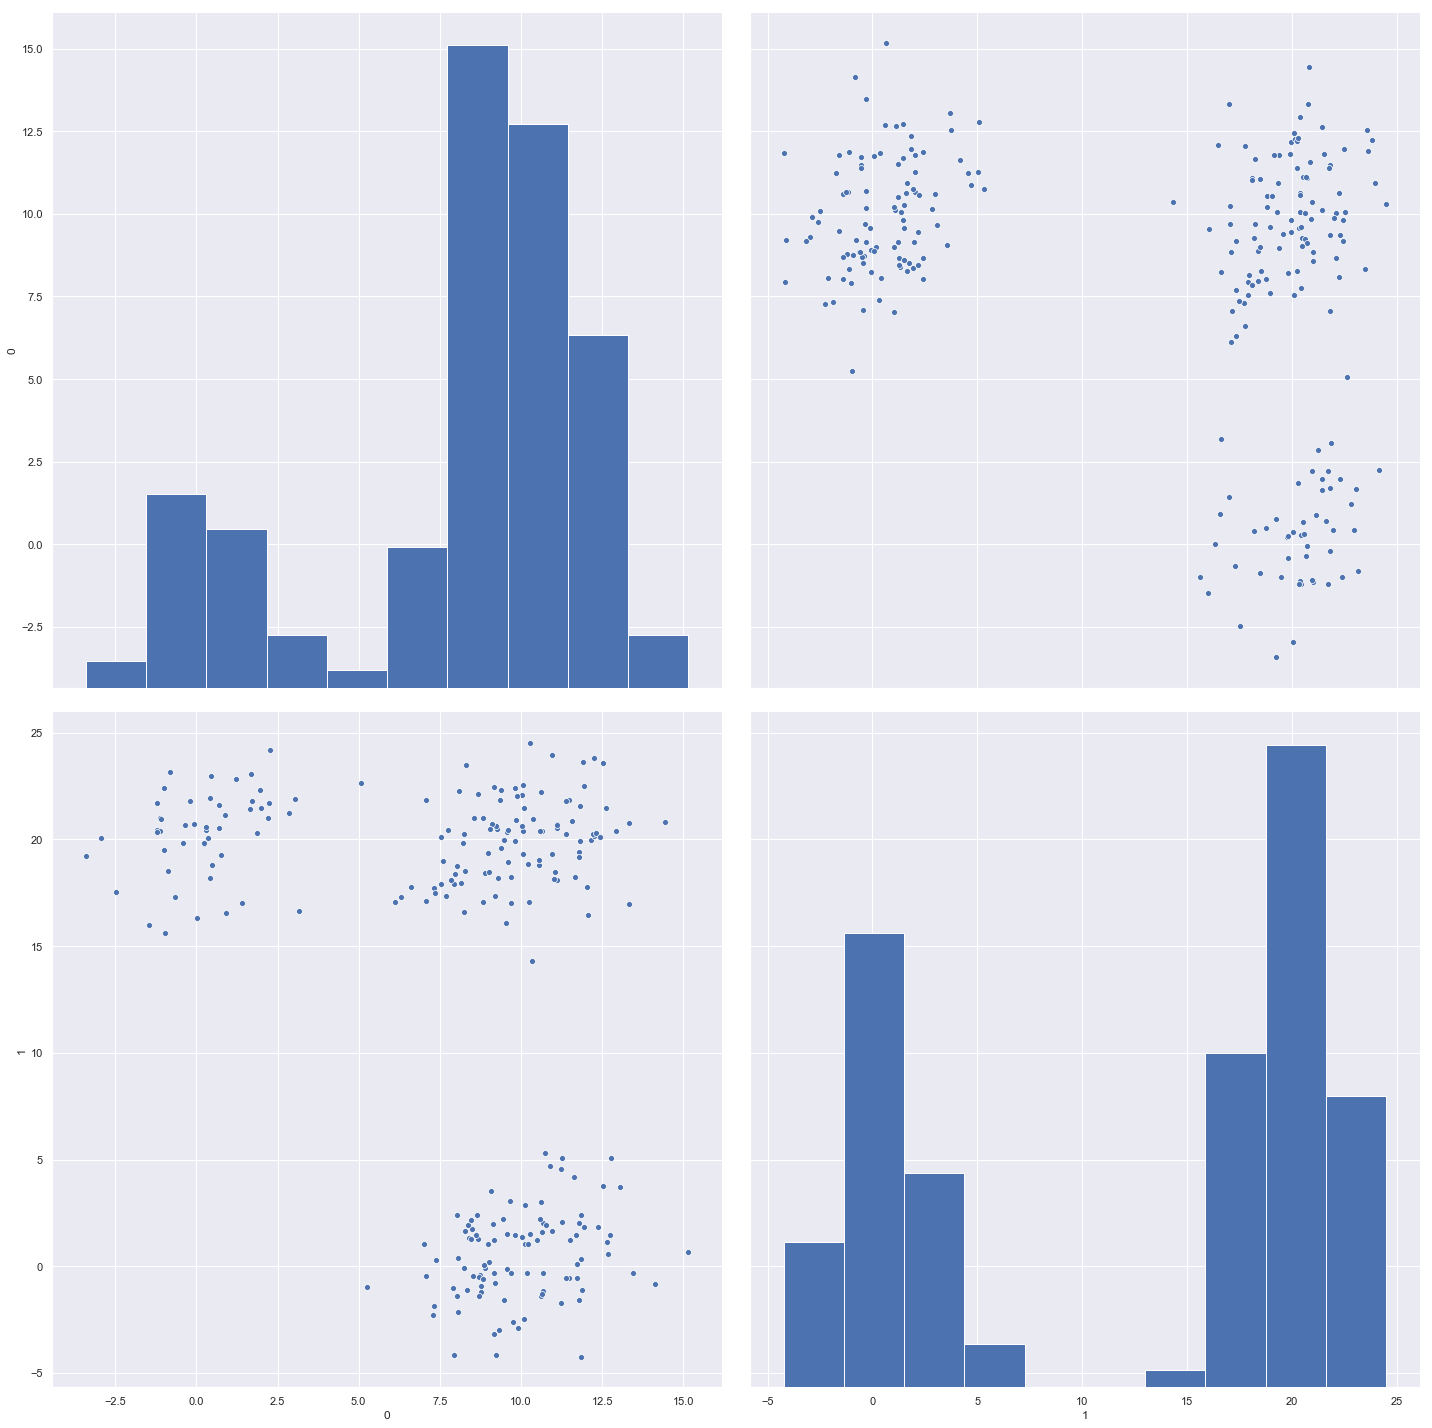

In [113]:
sns.pairplot(df,size=10)

### 11. Find out the linkage matrix

In [141]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
# from sklearn.cluster import AgglomerativeClustering 
# scaler=StandardScaler()
# scaler.fit(df)
# dfn=scaler.transform(df)
# dfn=pd.DataFrame(df)
#dfn.columns=colNames
#model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='ward')
#model.fit(df)
z=linkage(df,method='ward',metric="euclidean")
c, coph_dists = cophenet(z , pdist(df))
print(c)

0.9532151867374189


Use ward as linkage metric and distance as Eucledian

In [142]:
print(z)

[[1.13000000e+02 1.19000000e+02 3.40075269e-02 2.00000000e+00]
 [3.30000000e+01 9.70000000e+01 3.84645489e-02 2.00000000e+00]
 [1.68000000e+02 2.35000000e+02 6.09070970e-02 2.00000000e+00]
 [1.14000000e+02 1.20000000e+02 6.40752572e-02 2.00000000e+00]
 [1.10000000e+01 3.40000000e+01 6.94665105e-02 2.00000000e+00]
 [1.73000000e+02 1.74000000e+02 7.26003875e-02 2.00000000e+00]
 [2.05000000e+02 2.38000000e+02 7.61534012e-02 2.00000000e+00]
 [1.54000000e+02 1.55000000e+02 7.77619980e-02 2.00000000e+00]
 [1.08000000e+02 1.38000000e+02 7.96079516e-02 2.00000000e+00]
 [6.00000000e+01 9.10000000e+01 8.25461910e-02 2.00000000e+00]
 [5.80000000e+01 6.20000000e+01 9.90942564e-02 2.00000000e+00]
 [1.79000000e+02 1.90000000e+02 1.00331068e-01 2.00000000e+00]
 [1.31000000e+02 2.58000000e+02 1.01405894e-01 3.00000000e+00]
 [2.08000000e+02 2.57000000e+02 1.16768873e-01 3.00000000e+00]
 [5.00000000e+00 7.10000000e+01 1.20025590e-01 2.00000000e+00]
 [4.20000000e+01 7.40000000e+01 1.20740480e-01 2.000000

### 12. Plot the dendrogram for the consolidated dataframe

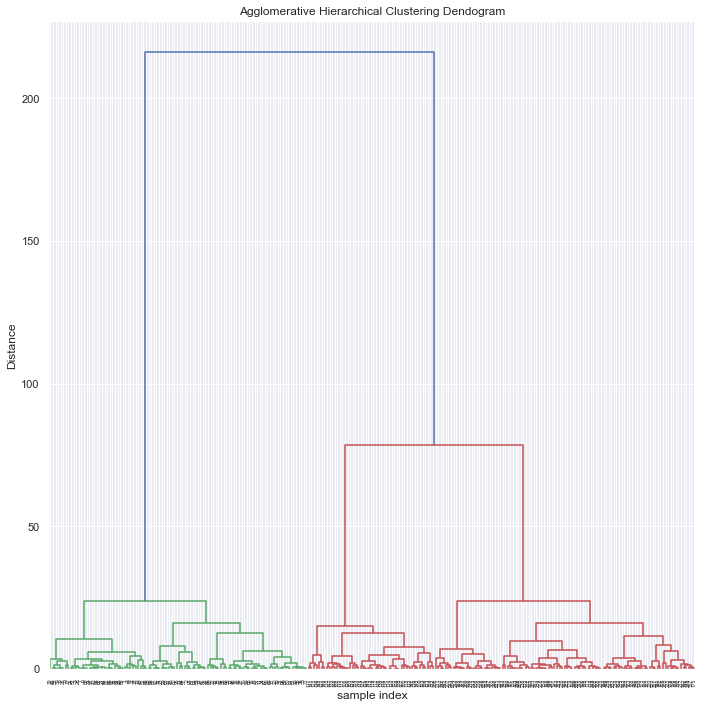

In [143]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(z)
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

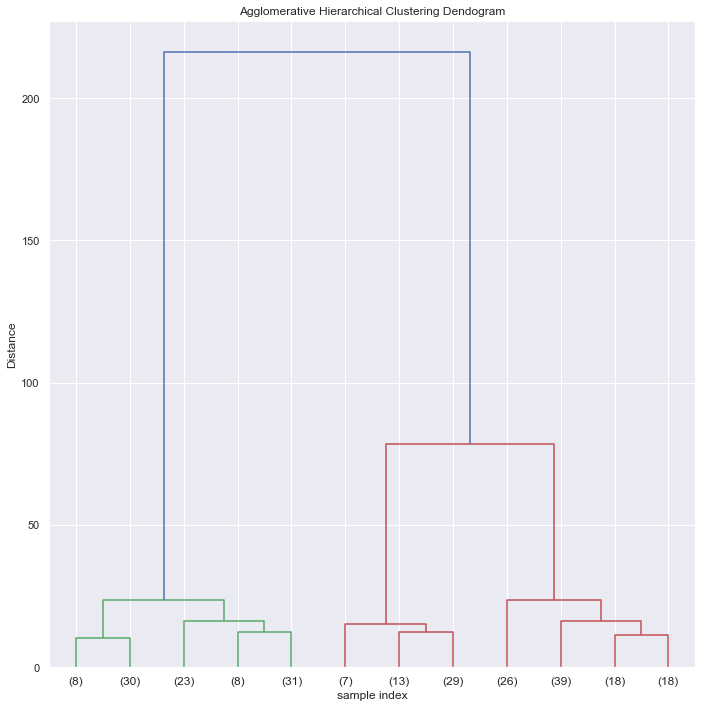

In [144]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(z,p=12,truncate_mode='lastp')
plt.tight_layout()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

## Optimal distance can be 75-25 = 50 which crosses 3 dendrogram

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [158]:
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fclusterdata
cluster = fcluster(z, t=75,criterion="distance")
print(cluster)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 3 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


### Use matplotlib to visually observe the clusters in 2D space 

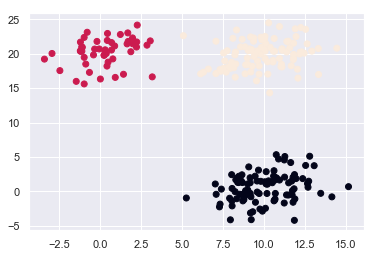

In [161]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=cluster)